# Analysis on Seasonal Pattern of Prices

In [8]:
#Cleaning the data

import pandas as pd
import numpy as np
import re

calendarDF=pd.read_csv("calendar.csv")

#replacing NaN values with 0
calendarDF.fillna(0, inplace=True)
#export_csv = calendarDF.to_csv (r'/Users/abhishekkonduri/Main/CMPE_256/Final_Project/seattle/check.csv', index = None, header=True)
calendarDF = calendarDF[calendarDF.price != 0]
#export_csv = calendarDF.to_csv (r'/Users/abhishekkonduri/Main/CMPE_256/Final_Project/seattle/check2.csv', index = None, header=True)

# #Extracting prices from the table
price = calendarDF['price']
# Create a prices array which will be later used to append price values
prices=[]

#if anything other than digits between 0 and 9 found , just replace it with ''
for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
# #replace the price column with the new column
calendarDF['price']=prices

calendarDF = calendarDF[calendarDF.price >= 0]

# #separating date column into day month and year
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
calendarDF.tail()

#export_csv = calendarDF.to_csv (r'/Users/abhishekkonduri/Main/CMPE_256/Final_Project/seattle/export_dataframe.csv', index = None, header=True)

,listing_id,date,available,price,Year,Month,Day
1393207,10208623,2016-01-06,t,87.0,2016,01,06
1393208,10208623,2016-01-07,t,87.0,2016,01,07
1393211,10208623,2016-01-10,t,87.0,2016,01,10
1393212,10208623,2016-01-11,t,87.0,2016,01,11
1393213,10208623,2016-01-12,t,87.0,2016,01,12


In [9]:
yearDF=calendarDF.groupby(['Year','Month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['Year'].map(str) + "-" + yearDF['Month'].map(str)
yearDF.to_csv('calendarOutput.csv')
yearDF.head()

,Year,Month,average_Price,year-Month
0,2016,01,121.568409,2016-01
1,2016,02,124.293927,2016-02
2,2016,03,128.644488,2016-03
3,2016,04,135.097005,2016-04
4,2016,05,139.538183,2016-05


Text(0, 0.5, 'Average Price')

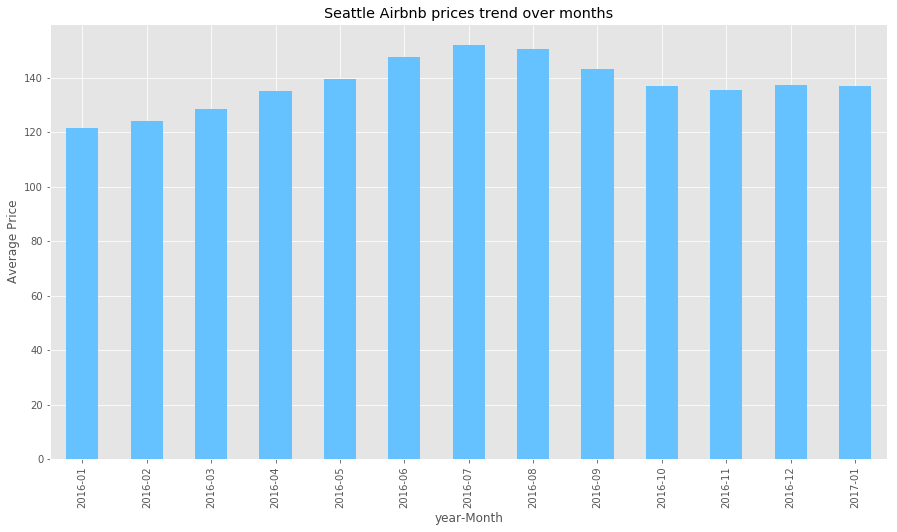

In [10]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = yearDF['year-Month']
y_pos = yearDF['average_Price']

yearDF.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Seattle Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')

In [15]:
#getting day name from date data and holidays
# !pip install holidays
from datetime import date
import holidays
import datetime
import calendar


calendarDF.fillna(0, inplace=True)
us_holidays = holidays.US()

calendarDF['day_Name']='default'
calendarDF['holiday']='False'
calendarDF['us_holidays_name']='working'
for index,row in calendarDF.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
#     print("sdate is",sdate)
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
#     print("vall is",vall)
    calendarDF.set_value(index,'day_Name',calendar.day_name[sdate.weekday()])
    calendarDF.set_value(index,'holiday',vall)
    calendarDF.set_value(index,'us_holidays_name',us_holidays.get(sdate))
calendarDF.to_csv('holidays_data.csv')
calendarDF.head()

/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,listing_id,date,available,price,Year,Month,Day,day_Name,holiday,us_holidays_name
0,241032,2016-01-04,t,85.0,2016,01,04,Monday,False,None
1,241032,2016-01-05,t,85.0,2016,01,05,Tuesday,False,None
9,241032,2016-01-13,t,85.0,2016,01,13,Wednesday,False,None
10,241032,2016-01-14,t,85.0,2016,01,14,Thursday,False,None
14,241032,2016-01-18,t,85.0,2016,01,18,Monday,True,"Martin Luther King, Jr. Day"


In [16]:
dayDF=calendarDF.groupby('day_Name').price.mean()
dayDF=dayDF.reset_index()
dayDF['day_num']=0

for index,row in dayDF.iterrows():
    if row['day_Name']=='Monday':
        dayDF.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        dayDF.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        dayDF.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        dayDF.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        dayDF.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        dayDF.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        dayDF.set_value(index,'day_num',7)
dayDF=dayDF.sort_values('day_num',ascending=[1])
dayDF=dayDF.rename(columns={'price':'Average_Price'})
dayDF

/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarnin

,day_Name,Average_Price,day_num
1,Monday,135.676414,1
5,Tuesday,135.408764,2
6,Wednesday,135.447880,3
4,Thursday,136.476032,4
0,Friday,143.036294,5
2,Saturday,143.202136,6
3,Sunday,136.459941,7


In [28]:
# !pip install bokeh
from bokeh.plotting import Scatter, output_notebook, show
output_notebook()

p = Scatter(dayDF, x='day_Name', y='Average_Price', title="average price trend over a Week for all the listings",
            xlabel="Days Of Week", ylabel="Average Price")


show(p)

ImportError: cannot import name 'Scatter' from 'bokeh.plotting' (/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/bokeh/plotting/__init__.py)

In [22]:
!pip install bokeh

In [29]:
from bokeh.plotting import Scatter

ImportError: cannot import name 'Scatter' from 'bokeh.plotting' (/Users/abhishekkonduri/anaconda3/lib/python3.7/site-packages/bokeh/plotting/__init__.py)

In [25]:
import bokeh

In [40]:
import matplotlib.pyplot as plt

In [31]:
import numpy as np

In [34]:
x=np.array(dayDF["day_Name"])

In [35]:
y=np.array(dayDF["Average_Price"])

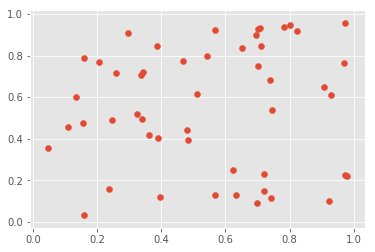

In [44]:

plt.scatter(x, y)

In [45]:
#checking which holiday has maximum listings

holidayDF=calendarDF.groupby('us_holidays_name').listing_id.count()
holidayDF=holidayDF.reset_index()
holidayDF=holidayDF.sort_values('listing_id',ascending=[0])
holidayDF

,us_holidays_name,listing_id
7,New Year's Day,2922
1,Christmas Day (Observed),2831
0,Christmas Day,2829
8,New Year's Day (Observed),2776
9,Thanksgiving,2746
10,Veterans Day,2718
2,Columbus Day,2650
6,Memorial Day,2583
4,Labor Day,2544
11,Washington's Birthday,2529


[Text(0, 0.5, 'Total Number of Listings'), Text(0.5, 0, 'US Holidays Name')]

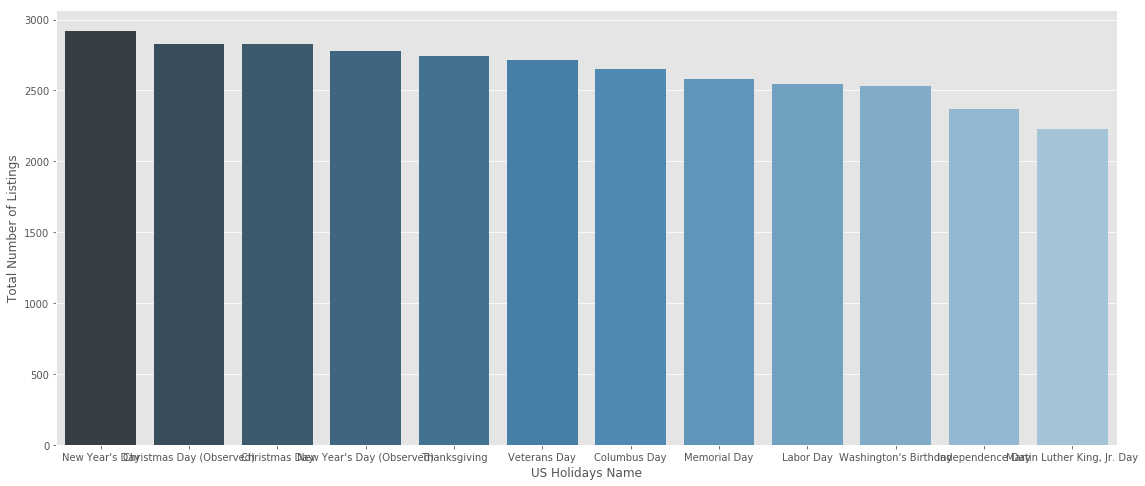

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("us_holidays_name", y="listing_id", data=holidayDF,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Total Number of Listings')

In [47]:
holidayPriceDF=calendarDF.groupby('us_holidays_name').price.mean()
holidayPriceDF=holidayPriceDF.reset_index()
holidayPriceDF=holidayPriceDF.sort_values('price',ascending=[0])

holidayPriceDF.head(10)

,us_holidays_name,price
3,Independence Day,151.402362
6,Memorial Day,143.233837
4,Labor Day,142.087264
10,Veterans Day,140.070272
7,New Year's Day,138.126968
0,Christmas Day,137.974903
1,Christmas Day (Observed),137.895797
9,Thanksgiving,136.054989
8,New Year's Day (Observed),135.572767
2,Columbus Day,134.985660


[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'US Holidays Name')]

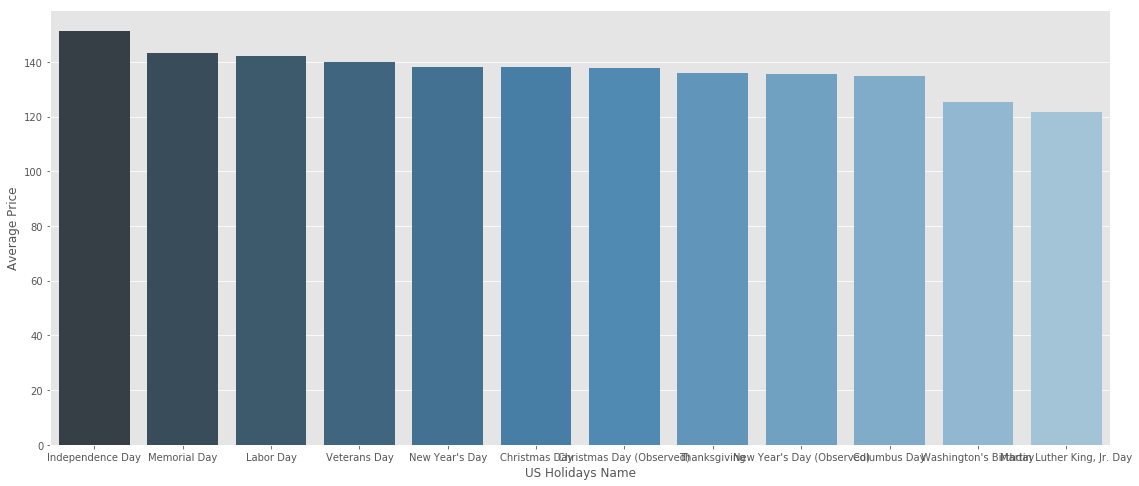

In [55]:
# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("us_holidays_name", y="price", data=holidayPriceDF,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Average Price')

In [56]:
merger=pd.merge(holidayDF,holidayPriceDF,on='us_holidays_name')
merger=merger.rename(columns={'listing_id':'number_Of_Listings'})
merger=merger.rename(columns={'price':'average_Price'})
merger

,us_holidays_name,number_Of_Listings,average_Price
0,New Year's Day,2922,138.126968
1,Christmas Day (Observed),2831,137.895797
2,Christmas Day,2829,137.974903
3,New Year's Day (Observed),2776,135.572767
4,Thanksgiving,2746,136.054989
5,Veterans Day,2718,140.070272
6,Columbus Day,2650,134.985660
7,Memorial Day,2583,143.233837
8,Labor Day,2544,142.087264
9,Washington's Birthday,2529,125.353895


In [58]:
#analyzing longweekednd holiday days

columbusDF=calendarDF[(calendarDF['Year'] == '2016') & (calendarDF['Month'] == '07' ) & ((calendarDF['Day'] == '02') | (calendarDF['Day'] == '03') | (calendarDF['Day'] == '04'))]
columbusDF.groupby('Month').price.mean()

Month
07    153.407527
Name: price, dtype: float64

In [59]:
#analyzing rest of the days

NocolumbusDF=calendarDF[(calendarDF['Year'] == '2016') & (calendarDF['Month'] == '07' ) & ((calendarDF['Day'] != '02') | (calendarDF['Day'] != '03') | (calendarDF['Day'] != '04'))]
NocolumbusDF.groupby('Month').price.mean()

Month
07    152.09415
Name: price, dtype: float64

In [63]:
# analyzing data from date 1st of July to date 9th of July which includes both long weekend and normal workdays

JulyDF=calendarDF[(calendarDF['Year'] == '2016') & (calendarDF['Month'] == '07' )& ((calendarDF['Day'] == '01' )| (calendarDF['Day'] == '02' )| (calendarDF['Day'] == '03' )| (calendarDF['Day'] == '04' )| (calendarDF['Day'] == '05' )| (calendarDF['Day'] == '06' )| (calendarDF['Day'] == '07' )| (calendarDF['Day'] == '08' )| (calendarDF['Day'] == '09' )| (calendarDF['Day'] == '10' ))]
JulyDF=JulyDF.groupby('Day').price.mean()
JulyDF=JulyDF.reset_index()
JulyDF=JulyDF.sort_values('Day',ascending=[1])
JulyDF=JulyDF.rename(columns={'price':'Average_Price'})
JulyDF.head(10)

,Day,Average_Price
0,01,157.480000
1,02,157.080967
2,03,151.752961
3,04,151.402362
4,05,150.522832
5,06,150.200837
6,07,150.709570
7,08,156.260469
8,09,156.448161
9,10,150.302538


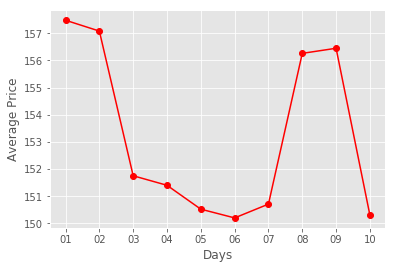

In [64]:
import numpy as np
import matplotlib.pyplot as plt

x=JulyDF['Day'].tolist()
y=JulyDF['Average_Price'].tolist()

plt.plot(x,y, 'ro-')
plt.ylabel('Average Price')
plt.xlabel('Days')
plt.show()